# imports

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from skimage import feature,color,io,exposure


%matplotlib inline

# Load data

In [4]:
letter_images=pd.read_csv("emnist-letters-train.csv")

In [5]:
letter_images.iloc[:,0]=letter_images.iloc[:,0]-1
letter_images.iloc[:,0].min(),letter_images.iloc[:,0].max()

(0, 25)

In [6]:
X=letter_images.iloc[:,1:].values
y=letter_images.iloc[:,0].values

In [7]:
X.shape,y.shape

((88799, 784), (88799,))

# split data

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)

In [12]:
X_train.shape,y_train.shape,X_train[0].reshape((28,28))

((71039, 784),
 (71039,),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   4,   4,   4,   4,   4,   4,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           2,  21,  37,  51, 114, 127, 127, 127, 127, 113,  32,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   4,   9,  32,  37,  37,  39,
          82, 172, 215, 222, 245, 250, 250, 250, 250, 241, 113,   4,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   1,  33, 113, 140, 203, 217, 217, 217,
         233, 252, 254, 254, 254, 254, 255, 255, 254, 249, 125,   4,   0,
           0,   0],
        [  0,   0,   0,   0,   0,  20, 158, 243, 250, 254, 254, 254, 254,
         254, 254, 255, 254, 254, 254, 252, 250, 249, 218,  

# extract features

In [14]:
train_feature=[]
test_feature=[]

for train_img in X_train:
    train_img=train_img.reshape((28,28))
    
    hog_train_img,_=feature.hog(train_img,visualize=True)
    train_feature.append(hog_train_img)
    
for test_img in X_test:
    test_img=test_img.reshape((28,28))
    
    hog_test_img,_=feature.hog(test_img,visualize=True)
    test_feature.append(hog_test_img)
    

# example

Text(0.5, 1.0, 'hog image')

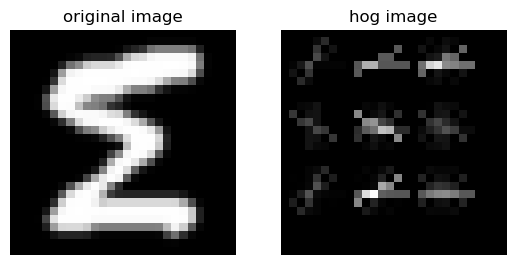

In [15]:
gray_image=X_train[0].reshape((28,28))

hog_feature,hog_img= feature.hog(gray_image,visualize=True)

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(gray_image,cmap="gray")
plt.title("original image")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(hog_img,cmap="gray")
plt.title("hog image")

In [16]:
X_train_img=np.array(train_feature)
X_test_img=np.array(test_feature)

In [18]:
X_train_img.shape,X_test_img.shape,y_train.shape,y_test.shape,X_train_img[0]

((71039, 81),
 (17760, 81),
 (71039,),
 (17760,),
 array([0.05155334, 0.19415064, 0.05275564, 0.03815856, 0.02209135,
        0.        , 0.        , 0.        , 0.        , 0.00029144,
        0.        , 0.        , 0.27890324, 0.27890324, 0.        ,
        0.        , 0.        , 0.        , 0.05621193, 0.03579691,
        0.0513144 , 0.27890324, 0.27890324, 0.03720735, 0.05141763,
        0.0370999 , 0.        , 0.08828985, 0.        , 0.        ,
        0.        , 0.00102005, 0.04224796, 0.20652768, 0.03295378,
        0.04565095, 0.07160827, 0.02972781, 0.12953769, 0.09232473,
        0.20324273, 0.27890324, 0.15482825, 0.03226252, 0.02185222,
        0.05781302, 0.04621529, 0.07631305, 0.01318361, 0.05398086,
        0.10490416, 0.12485438, 0.00645468, 0.08681119, 0.04828921,
        0.18842894, 0.13547496, 0.        , 0.01808427, 0.        ,
        0.0062931 , 0.        , 0.02710585, 0.04418358, 0.11880811,
        0.27890324, 0.10739421, 0.27890324, 0.01124422, 0.        

# Model

In [21]:
model= Sequential([
    tf.keras.Input(shape=(81,)),
    Dense(units=128,activation="relu",name="layer1"),
    Dense(units=128,activation="relu",name="layer2"),
    Dense(units=26,activation="linear",name="layer3")
],name="Mymodel"
)

# Model summary

In [22]:
model.summary()

Model: "Mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               10496     
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 26)                3354      
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# shape of parameters

In [23]:
[layer1,layer2,layer3]=model.layers

In [24]:
w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()

w3,b3=layer3.get_weights()

print(f"w1 shape:{w1.shape} , b1 shape: {b1.shape}")
print(f"w2 shape:{w2.shape} , b2 shape: {b2.shape}")
print(f"w3 shape:{w3.shape} , b3 shape: {b3.shape}")

w1 shape:(81, 128) , b1 shape: (128,)
w2 shape:(128, 128) , b2 shape: (128,)
w3 shape:(128, 26) , b3 shape: (26,)


# compiling (loss function)

In [25]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [26]:
Letter_recognition=model.fit(
    X_train_img,y_train,
    epochs=100
)

Epoch 1/100
2220/2220 [==============================] - 3s 948us/step - loss: 0.9415 - accuracy: 0.7160
Epoch 2/100
2220/2220 [==============================] - 2s 925us/step - loss: 0.5581 - accuracy: 0.8190
Epoch 3/100
2220/2220 [==============================] - 2s 951us/step - loss: 0.4638 - accuracy: 0.8477
Epoch 4/100
2220/2220 [==============================] - 2s 983us/step - loss: 0.4120 - accuracy: 0.8645
Epoch 5/100
2220/2220 [==============================] - 2s 992us/step - loss: 0.3783 - accuracy: 0.8743
Epoch 6/100
2220/2220 [==============================] - 2s 969us/step - loss: 0.3537 - accuracy: 0.8816
Epoch 7/100
2220/2220 [==============================] - 2s 955us/step - loss: 0.3334 - accuracy: 0.8871
Epoch 8/100
2220/2220 [==============================] - 2s 970us/step - loss: 0.3163 - accuracy: 0.8930
Epoch 9/100
2220/2220 [==============================] - 2s 960us/step - loss: 0.3024 - accuracy: 0.8966
Epoch 10/100
2220/2220 [==============================]

# make prediction

In [27]:
prediction_model=model.predict(X_test_img)

555/555 [==============================] - 0s 685us/step


In [28]:
prediction_model[:10]

array([[ -31.794495 ,  -25.60441  ,  -44.376377 ,  -46.437378 ,
          -7.5898824,    7.123374 ,  -26.278435 ,  -19.728567 ,
          -6.455234 ,  -17.18562  ,   -3.5534697,  -19.348867 ,
         -58.52816  ,  -56.81618  ,  -47.16036  ,   -9.470263 ,
         -14.7424345,  -20.836134 ,  -31.54534  ,   -0.4270723,
         -63.586636 ,  -39.33446  ,  -62.027737 ,  -38.240467 ,
           5.818669 ,  -17.979828 ],
       [  -6.424192 ,  -32.203125 ,  -63.61265  ,  -57.16297  ,
         -12.057775 ,   47.069046 ,  -32.867115 ,  -55.96651  ,
         -17.510925 ,  -39.674873 ,  -38.523983 ,  -40.843758 ,
        -104.42983  ,  -94.908554 ,  -70.529236 ,  -20.775862 ,
         -16.530409 ,  -28.060013 ,  -36.061596 ,  -23.761    ,
        -128.4683   , -130.4208   ,  -88.60557  ,  -77.082985 ,
         -82.413284 ,  -63.7414   ],
       [ -36.47353  ,  -31.217728 ,  -61.65085  ,  -47.336315 ,
         -61.893368 ,  -84.35785  ,  -17.175709 ,  -12.331809 ,
         -81.47993  ,  -62.026

In [29]:
prediction_p=tf.nn.softmax(prediction_model)
prediction_p

<tf.Tensor: shape=(17760, 26), dtype=float32, numpy=
array([[9.85744022e-18, 4.80932898e-15, 3.38471437e-23, ...,
        1.56427803e-20, 2.13281825e-01, 9.84912499e-12],
       [5.86384647e-24, 3.73709083e-35, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.31728380e-24, 1.01918739e-21, 6.18468732e-35, ...,
        4.21410179e-34, 1.58972779e-10, 1.44468921e-36],
       ...,
       [2.36036094e-22, 5.18009577e-33, 0.00000000e+00, ...,
        9.24064823e-26, 1.02203192e-24, 1.41911607e-20],
       [4.51755682e-07, 2.21506737e-11, 7.71423452e-13, ...,
        1.08147735e-14, 1.70083453e-07, 2.63210180e-20],
       [3.90715927e-15, 6.69794109e-16, 1.39844011e-20, ...,
        2.09892837e-15, 8.58539195e-09, 3.51525958e-14]], dtype=float32)>

# accuracy

In [30]:
loss,accurecy=model.evaluate(X_test_img,y_test)

555/555 [==============================] - 1s 857us/step - loss: 0.8629 - accuracy: 0.8776


In [31]:
accurecy

0.8776463866233826